### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.model_selection import train_test_split
sql = lambda q: sqldf(q, globals())
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('sn_compliance_control.xlsx')
df.head()

C:\Users\STANLEY\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Number  \
0  CTRL0010001   
1  CTRL0010002   
2  CTRL0010003   
3  CTRL0010004   
4  CTRL0010005   

                                                                              Name  \
0          Establish and maintain identification mechanism termination procedures.   
1                                                    Review facility access lists.   
2                 Manage access to loading docks, unloading docks, and mail rooms.   
3                      Establish and maintain a visitor access permissions policy.   
4  Use locks with electronic authentication systems or cipher locks, as necessary.   

               Profile             Owner  \
0  New York Datacenter  Patty Bernasconi   
1  New York Datacenter  Patty Bernasconi   
2  New York Datacenter  Patty Bernasconi   
3  New York Datacenter  Patty Bernasconi   
4  New York Datacenter  Patty Bernasconi   

                                                                  Policy Statement  \
0          Establish and maintain identification mechanism termination procedures.   
1                                                    Review facility access lists.   
2                 Manage access to loading docks, unloading docks, and mail rooms.   
3                      Establish and maintain a visitor access permissions policy.   
4  Use locks with electronic authentication systems or cipher locks, as necessary.   

     State          Status  Exempt  Weighting  Active  Additional Information  \
0  Monitor       Compliant    True       10.0    True                     NaN   
1  Monitor  Not Applicable   False       10.0    True                     NaN   
2  Monitor       Compliant   False       10.0    True                     NaN   
3  Monitor  Not Applicable   False       10.0    True                     NaN   
4  Monitor       Compliant   False       10.0    True                     NaN   

   Additional comments      Attestation Attestation respondents  \
0                  NaN  GRC Attestation        Patty Bernasconi   
1                  NaN  GRC Attestation        Patty Bernasconi   
2                  NaN  GRC Attestation        Patty Bernasconi   
3                  NaN  GRC Attestation        Patty Bernasconi   
4                  NaN  GRC Attestation        Patty Bernasconi   

                                Category    Class Classification  \
0  Physical and environmental protection  Control     Preventive   
1  Physical and environmental protection  Control      Detective   
2  Physical and environmental protection  Control     Preventive   
3  Physical and environmental protection  Control     Preventive   
4  Physical and environmental protection  Control     Preventive   

              Created  Created Manually Created by  \
0 2016-07-31 16:19:45             False      admin   
1 2016-07-31 16:19:46             False      admin   
2 2016-07-31 16:19:46             False      admin   
3 2016-07-31 16:19:46             False      admin   
4 2016-07-31 16:19:46             False      admin   

                                                                       Description  \
0          Establish and maintain identification mechanism termination procedures.   
1                                                    Review facility access lists.   
2                 Manage access to loading docks, unloading docks, and mail rooms.   
3                      Establish and maintain a visitor access permissions policy.   
4  Use locks with electronic authentication systems or cipher locks, as necessary.   

   Domain Domain Path  Enforcement  Frequency  From configuration check  \
0  global           /          NaN        NaN                     False   
1  global           /          NaN        NaN                     False   
2  global           /          NaN        NaN                     False   
3  global           /          NaN        NaN                     False   
4  global           /          NaN        NaN                     False   

   Key c

In [4]:
df.Domain.value_counts()

global    1501
Name: Domain, dtype: int64

#### Check for null values

In [5]:
df.isnull().sum()

Number                         0
Name                           0
Profile                        0
Owner                          3
Policy Statement               3
State                          0
Status                        27
Exempt                         0
Weighting                      0
Active                         0
Additional Information      1501
Additional comments         1501
Attestation                    3
Attestation respondents        3
Category                       3
Class                          0
Classification                 3
Created                        0
Created Manually               0
Created by                     0
Description                   12
Domain                         0
Domain Path                    0
Enforcement                 1501
Frequency                   1501
From configuration check       0
Key control                    0
Owning group                1501
Profile type                1501
Profile type.1              1501
Source    

#### Removing columns which is completely null

In [6]:
drop_cols=df.columns[df.isnull().sum() ==1501]
df.drop(drop_cols,axis=1,inplace=True)

In [7]:
#Since Name,Description and Policy statement are having same values we are replacing
df.Description.fillna(df.Name,inplace=True)

In [8]:
df.isnull().sum()

Number                       0
Name                         0
Profile                      0
Owner                        3
Policy Statement             3
State                        0
Status                      27
Exempt                       0
Weighting                    0
Active                       0
Attestation                  3
Attestation respondents      3
Category                     3
Class                        0
Classification               3
Created                      0
Created Manually             0
Created by                   0
Description                  0
Domain                       0
Domain Path                  0
From configuration check     0
Key control                  0
Source                      13
Type                         3
Updated                      0
Updated by                   0
Updates                      0
dtype: int64

#### Excluding the remaining null values by using sql statement

In [9]:
df_altered  = sql('select * from df where Status is not null and Source is not null and classification is not null ')

In [10]:
df_altered.isnull().sum() 

Number                      0
Name                        0
Profile                     0
Owner                       0
Policy Statement            0
State                       0
Status                      0
Exempt                      0
Weighting                   0
Active                      0
Attestation                 0
Attestation respondents     0
Category                    0
Class                       0
Classification              0
Created                     0
Created Manually            0
Created by                  0
Description                 0
Domain                      0
Domain Path                 0
From configuration check    0
Key control                 0
Source                      0
Type                        0
Updated                     0
Updated by                  0
Updates                     0
dtype: int64

In [11]:
df_altered.head(2)

Number  \
0  CTRL0010001   
1  CTRL0010002   

                                                                      Name  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

               Profile             Owner  \
0  New York Datacenter  Patty Bernasconi   
1  New York Datacenter  Patty Bernasconi   

                                                          Policy Statement  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

     State          Status  Exempt  Weighting  Active      Attestation  \
0  Monitor       Compliant       1       10.0       1  GRC Attestation   
1  Monitor  Not Applicable       0       10.0       1  GRC Attestation   

  Attestation respondents                               Category    Class  \
0        Patty Bernasconi  Physical and environmental protection  Control   
1        Patty Bernasconi  Physical and environmental protection  Control   

  Classification                     Created  Created Manually Created by  \
0     Preventive  2016-07-31 16:19:45.000000                 0      admin   
1      Detective  2016-07-31 16:19:46.000000                 0      admin   

                                                               Description  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

   Domain Domain Path  From configuration check  Key control  \
0  global           /                         0            0   
1  global           /                         0            0   

                              Source                              Type  \
0  d85a18e70fd412004e938fbce1050e49,  Establish/Maintain Documentation   
1  d85a18e70fd412004e938fbce1050e49,  Establish/Maintain Documentation   

                      Updated Updated by  Updates  
0  2018-01-29 18:20:47.000000      admin      9.0  
1  2017-02-28 12:19:33.000000      admin      6.0

In [12]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_d

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading packag

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\STANLEY\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is al

#### Creating new Dataframe

In [13]:
df_new=pd.DataFrame()
df_new['Name']=df_altered['Name']


#### Word Tokenization

In [14]:
df_new['Token'] = df_altered['Name'].apply(lambda x:word_tokenize(x))

#### Case conversion

In [15]:
df_new['lower'] = df_new['Token'].apply(lambda x: [word.lower() for word in x])
df_new.head()

Name  \
0          Establish and maintain identification mechanism termination procedures.   
1                                                    Review facility access lists.   
2                 Manage access to loading docks, unloading docks, and mail rooms.   
3                      Establish and maintain a visitor access permissions policy.   
4  Use locks with electronic authentication systems or cipher locks, as necessary.   

                                                                                             Token  \
0                [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                                             [Review, facility, access, lists, .]   
2                [Manage, access, to, loading, docks, ,, unloading, docks, ,, and, mail, rooms, .]   
3                           [Establish, and, maintain, a, visitor, access, permissions, policy, .]   
4  [Use, locks, with, electronic, authentication, systems, or, cipher, locks, ,, as, necessary, .]   

                                                                                             lower  
0                [establish, and, maintain, identification, mechanism, termination, procedures, .]  
1                                                             [review, facility, access, lists, .]  
2                [manage, access, to, loading, docks, ,, unloading, docks, ,, and, mail, rooms, .]  
3                           [establish, and, maintain, a, visitor, access, permissions, policy, .]  
4  [use, locks, with, electronic, authentication, systems, or, cipher, locks, ,, as, necessary, .]

#### Punctuation Removal

In [16]:
import string
punc=string.punctuation
df_new['punc_removed']=df_new['lower'].apply(lambda x: [word for word in x if word not in punc])
df_new.head(2)

Name  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

                                                                               Token  \
0  [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [Review, facility, access, lists, .]   

                                                                               lower  \
0  [establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [review, facility, access, lists, .]   

                                                                     punc_removed  
0  [establish, and, maintain, identification, mechanism, termination, procedures]  
1                                               [review, facility, access, lists]

#### Stop words removal

In [17]:
from nltk.corpus import *
stop_words = set(stopwords.words('english'))

#custom stopwords
stop_word_filtered = [word for word in stop_words if word not in ["not","no","nor","don't","aren't","couldn't",
                                                             "didn't",
                                                             "doesn't",
                                                             "hadn't",
                                                             "hasn't",
                                                             "haven't",
                                                             "isn't",
                                                             "mightn't",
                                                             "mustn't",
                                                             "needn't",
                                                             "shouldn't",
                                                             "wasn't",
                                                             "weren't",
                                                             "won't",
                                                             "wouldn't"]]


In [18]:
df_new['stopwords_removed'] = df_new['punc_removed'].apply(lambda x: [word for word in x if word not in stop_word_filtered])
df_new.head(2)

Name  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

                                                                               Token  \
0  [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [Review, facility, access, lists, .]   

                                                                               lower  \
0  [establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [review, facility, access, lists, .]   

                                                                     punc_removed  \
0  [establish, and, maintain, identification, mechanism, termination, procedures]   
1                                               [review, facility, access, lists]   

                                                           stopwords_removed  
0  [establish, maintain, identification, mechanism, termination, procedures]  
1                                          [review, facility, access, lists]

#### Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
#pos tagging
df_new['pos_tags'] = df_new['stopwords_removed'].apply(nltk.tag.pos_tag)
df_new.head(2)

Name  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

                                                                               Token  \
0  [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [Review, facility, access, lists, .]   

                                                                               lower  \
0  [establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [review, facility, access, lists, .]   

                                                                     punc_removed  \
0  [establish, and, maintain, identification, mechanism, termination, procedures]   
1                                               [review, facility, access, lists]   

                                                           stopwords_removed  \
0  [establish, maintain, identification, mechanism, termination, procedures]   
1                                          [review, facility, access, lists]   

                                                                                                         pos_tags  
0  [(establish, VB), (maintain, NN), (identification, NN), (mechanism, NN), (termination, NN), (procedures, NNS)]  
1                                                      [(review, NN), (facility, NN), (access, NN), (lists, NNS)]

In [21]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_new['wordnet_pos'] = df_new['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_new.head()

Name  \
0          Establish and maintain identification mechanism termination procedures.   
1                                                    Review facility access lists.   
2                 Manage access to loading docks, unloading docks, and mail rooms.   
3                      Establish and maintain a visitor access permissions policy.   
4  Use locks with electronic authentication systems or cipher locks, as necessary.   

                                                                                             Token  \
0                [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                                             [Review, facility, access, lists, .]   
2                [Manage, access, to, loading, docks, ,, unloading, docks, ,, and, mail, rooms, .]   
3                           [Establish, and, maintain, a, visitor, access, permissions, policy, .]   
4  [Use, locks, with, electronic, authentication, systems, or, cipher, locks, ,, as, necessary, .]   

                                                                                             lower  \
0                [establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                                             [review, facility, access, lists, .]   
2                [manage, access, to, loading, docks, ,, unloading, docks, ,, and, mail, rooms, .]   
3                           [establish, and, maintain, a, visitor, access, permissions, policy, .]   
4  [use, locks, with, electronic, authentication, systems, or, cipher, locks, ,, as, necessary, .]   

                                                                                punc_removed  \
0             [establish, and, maintain, identification, mechanism, termination, procedures]   
1                                                          [review, facility, access, lists]   
2                   [manage, access, to, loading, docks, unloading, docks, and, mail, rooms]   
3                        [establish, and, maintain, a, visitor, access, permissions, policy]   
4  [use, locks, with, electronic, authentication, systems, or, cipher, locks, as, necessary]   

                                                             stopwords_removed  \
0    [establish, maintain, identification, mechanism, termination, procedures]   
1                                            [review, facility, access, lists]   
2              [manage, access, loading, docks, unloading, docks, mail, rooms]   
3                  [establish, maintain, visitor, access, permissions, policy]   
4  [use, locks, electronic, authentication, systems, cipher, locks, necessary]   

                                                                                                                          pos_tags  \
0                   [(establish, VB), (maintain, NN), (identification, NN), (mechanism, NN), (termination, NN), (procedures, NNS)]   
1                                                                       [(review, NN), (facility, NN), (access, NN), (lists, NNS)]   
2             [(manage, NN), (access, NN), (loading, VBG), (docks, NNS), (unloading, VBG), (docks, NNS), (mail, NN), (rooms, NNS)]   
3                                 [(establish, VB), (maintain, NN), (visitor, NN), (access, NN), (permissions, NNS), (policy, NN)]   
4  [(use, NN), (locks, VBZ), (electronic, JJ), (authentication, NN), (systems, NNS), (cipher, VBP), (locks, NNS), (necessary, JJ)]   

                                                                                                           wordnet_pos  
0              [(establish, v), (maintain, n), (identification, n), (mechanism, n), (termination, n), (procedures, n)]  
1                                                                [(review, n), (facility, n), (access, n), (lists, n)]  
2              [(manage, n), (access, n), (loading, v), (docks, n), (unloading, v), (docks, n), (

#### Word Net Lemmatizer

In [22]:
wnl = WordNetLemmatizer()
df_new['lemmatized'] = df_new['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word,pos_tag) for word,pos_tag in x])
df_new.head(2)

Name  \
0  Establish and maintain identification mechanism termination procedures.   
1                                            Review facility access lists.   

                                                                               Token  \
0  [Establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [Review, facility, access, lists, .]   

                                                                               lower  \
0  [establish, and, maintain, identification, mechanism, termination, procedures, .]   
1                                               [review, facility, access, lists, .]   

                                                                     punc_removed  \
0  [establish, and, maintain, identification, mechanism, termination, procedures]   
1                                               [review, facility, access, lists]   

                                                           stopwords_removed  \
0  [establish, maintain, identification, mechanism, termination, procedures]   
1                                          [review, facility, access, lists]   

                                                                                                         pos_tags  \
0  [(establish, VB), (maintain, NN), (identification, NN), (mechanism, NN), (termination, NN), (procedures, NNS)]   
1                                                      [(review, NN), (facility, NN), (access, NN), (lists, NNS)]   

                                                                                               wordnet_pos  \
0  [(establish, v), (maintain, n), (identification, n), (mechanism, n), (termination, n), (procedures, n)]   
1                                                    [(review, n), (facility, n), (access, n), (lists, n)]   

                                                                 lemmatized  
0  [establish, maintain, identification, mechanism, termination, procedure]  
1                                          [review, facility, access, list]

#### Target Column

In [23]:
df_new['Target'] = df_altered['Classification']
df_new

Name  \
0                                                                                                              Establish and maintain identification mechanism termination procedures.   
1                                                                                                                                                        Review facility access lists.   
2                                                                                                                     Manage access to loading docks, unloading docks, and mail rooms.   
3                                                                                                                          Establish and maintain a visitor access permissions policy.   
4                                                                                                      Use locks with electronic authentication systems or cipher locks, as necessary.   
5                                                                                                                   Monitor for unauthorized physical access at physical entry points.   
6                                                                                                                                    Establish and maintain identification procedures.   
7                                                                                        Establish and maintain identification issuance procedures for identification cards or badges.   
8                                                                                                                           Use locks to protect against unauthorized physical access.   
9                                                                                                       Secure physical entry points with physical access controls or security guards.   
10                                                                    Authorize visitors before granting entry to physical areas containing restricted data or restricted information.   
11                                                                                                                               Control physical access to (and within) the facility.   
12                                                                                                              Escort uncleared personnel who need to work in or access secure areas.   
13                                                                                                       Identify and document physical access controls for all physical entry points.   
14                                                                                                                                  Escort visitors within the facility, as necessary.   
15    Maintain and review facility access lists of personnel who have been granted authorized entry to (and within) facilities that contain restricted data or restricted information.   
16                                                                                           Document the continuity plan exercise test results and provide them to senior management.   
17                                                                                                             Transport backup media in lockable electronic media storage containers.   
18                                                                  Separate the off-site electronic media storage facilities from the primary facility through geographic separation.   
19                                                                                            Separate the alternate facility from the primary facility through geographic separation.   
20                                                                                                                                  Install a generator sized to support the facility.   
21                                                                                    

In [24]:
df_new['str_lemmatized'] = str(df_new['lemmatized'])

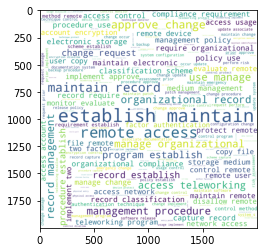

In [25]:
from wordcloud import WordCloud
wc=WordCloud(width=2000,height=2000,background_color='white')
wc = wc.generate(df_new[df_new['Target']=='Preventive']['str_lemmatized'].str.cat(sep=" "))
plt.imshow(wc)

### Model Building

In [26]:
X = df_new.lemmatized.astype(str)
y=df_new.Target

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y=encoder.fit_transform(y)    


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(X)
tfidf_X = tf.transform(X).toarray()

In [29]:
import pickle
pickle.dump(tf,open('transform.pkl','wb'))

In [67]:
X_train,X_test,y_train,y_test = train_test_split(tfidf_X,y,test_size=0.8,stratify=y,shuffle=True)

In [68]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
expected = y_test
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       139
           1       1.00      0.99      0.99      1033

    accuracy                           0.99      1172
   macro avg       0.95      0.99      0.97      1172
weighted avg       0.99      0.99      0.99      1172

[[ 139    0]
 [  14 1019]]


In [69]:
cm =metrics.confusion_matrix(expected, predicted)
cm_df = pd.DataFrame(cm,index=['Preventive','Detective'],columns=['Preventive','Detective'])
fig= px.imshow(cm_df,text_auto=True,labels=dict(x="Actual Value", y="Predicted Value"))
fig.update_xaxes(side="top")
fig.show()

In [70]:
px.bar(pd.DataFrame(df_new['Target'].value_counts()))

##### Clearly there is a imbalance in the dataset hence we need to balance the dataset using SMOTE

In [71]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm,y_sm = sm.fit_resample(tfidf_X,y)


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm ,test_size=0.9,shuffle=True,stratify=y_sm)

In [73]:
from sklearn.naive_bayes import MultinomialNB
model_sm = MultinomialNB()
model_sm.fit(X_train,y_train)
predicted = model_sm.predict(X_test)
expected = y_test
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1161
           1       1.00      0.98      0.99      1161

    accuracy                           0.99      2322
   macro avg       0.99      0.99      0.99      2322
weighted avg       0.99      0.99      0.99      2322

[[1160    1]
 [  18 1143]]


In [74]:
cm =metrics.confusion_matrix(expected, predicted)
cm_df = pd.DataFrame(cm,index=['Preventive','Detective'],columns=['Preventive','Detective'])
fig= px.imshow(cm_df,text_auto=True,labels=dict(x="Actual Value", y="Predicted Value"))
fig.update_xaxes(side="top")
fig.show()

### Pickling the model for Deployment

In [75]:
pickle.dump(model_sm,open('model.pkl','wb'))

In [76]:
message = 'Monitor for unauthorized physical access at physical entry points'
data = [message]
vect = tf.transform(data).toarray()
prediction = model_sm.predict(vect)
prediction

array([0])